In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")

print("Path to dataset files:", path)

100%|██████████| 11.3k/11.3k [00:00<00:00, 15.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/versions/1


In [4]:
import os
df = pd.read_csv(os.path.join(path, 'penguins_size.csv'))

In [5]:
print("Shape:", df.shape)
print(df.head())


Shape: (344, 7)
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [6]:
df = df.dropna()

In [7]:
# 🔤 ENCODE CATEGORICAL
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["species"] = le.fit_transform(df["species"])

In [8]:
# ✅ FEATURES (X) & TARGET (y)
X = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]]
y = df["species"]

In [9]:
 #✂ TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🌳 DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [10]:
 #🤖 PREDICTION
y_pred = dt.predict(X_test)


In [11]:
# 📊 ACCURACY & REPORT
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9801980198019802

Confusion Matrix:
 [[48  1  0]
 [ 1 17  0]
 [ 0  0 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.94      0.94      0.94        18
           2       1.00      1.00      1.00        34

    accuracy                           0.98       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.98      0.98      0.98       101



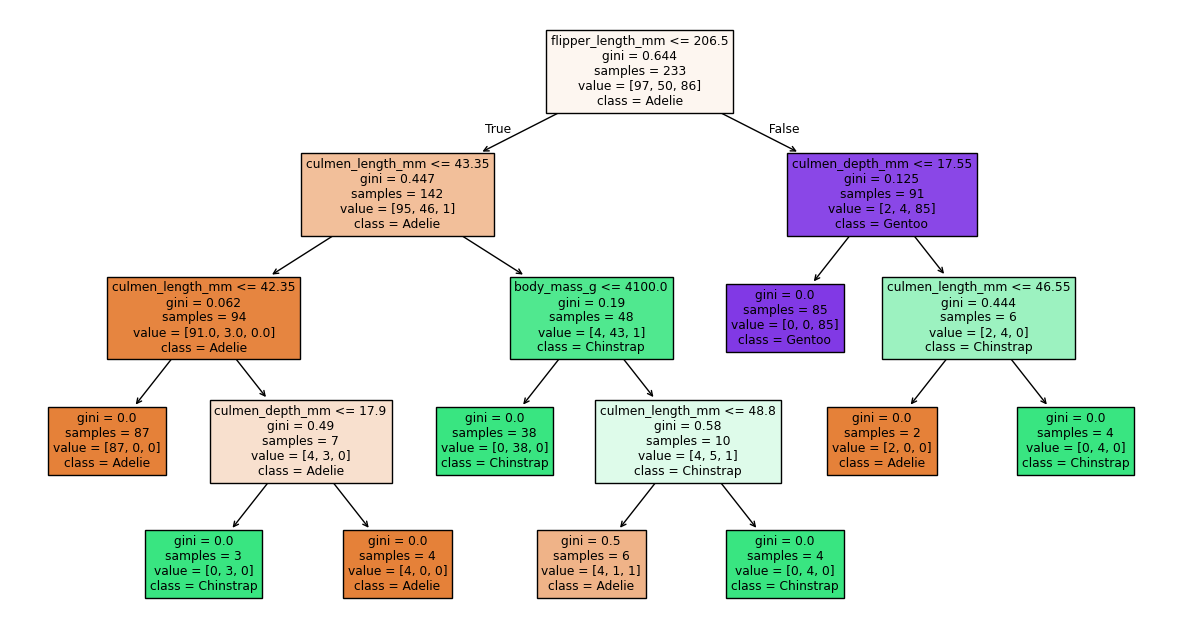

In [12]:

from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns, class_names=le.inverse_transform([0,1,2]), filled=True)
plt.show()


In [13]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(dt, file)

In [14]:
import os
from google.colab import files

# Define original and new filenames
original_filename = 'model.pkl'
new_download_filename = 'penguin_dtree_model.pkl'

# Rename the file locally before downloading
os.rename(original_filename, new_download_filename)

# Download the renamed file
files.download(new_download_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>